In [1]:
#import libraries
import os
import numpy as np
import json

In [6]:
import matplotlib.pyplot as plt

In [2]:
X_vals = [] 
y_vals = []
for vid_folder in os.listdir('bhujangasan/'):
    folder_name = 'bhujangasan/' + str(vid_folder) + '/'
    
    for frame in os.listdir(folder_name):
        with open(folder_name + frame) as json_data:
            d = json.load(json_data)
            try:
                data = d['people'][0]['pose_keypoints_2d']
                #remove confidence values
                for j in range(2,52,2):
                    data.pop(j)
            except:
                    print ("Failed at" + frame)
                    continue
            json_data.close
        npdata = np.asarray(data)
        Xdata = data[::2]
        X_vals.append(Xdata)
        Ydata = data[1::2]
        y_vals.append(Ydata)
    break

In [28]:
X = []
y = []
for i in range(25):
    for frame in X_vals:
        X.append(frame[i])

    for frame in y_vals:
        y.append(frame[i])

In [29]:
len(X) #545 frames, 545*25 

13625

In [87]:
import itertools

In [113]:
colors = iter(cm.rainbow(np.linspace(0, 1, 25)))

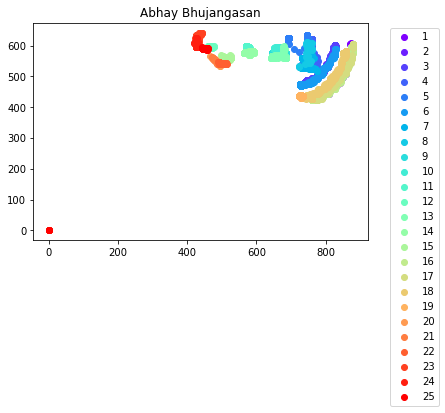

In [114]:
legends = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25']
k=0
for i in range(0, 13625, 545):
    plt.title('Abhay Bhujangasan')
    fig = plt.scatter(X[i:i+545], y[i:i+545], color=next(colors), label=legends[k])
    k+=1
plt.legend(loc ="upper left", bbox_to_anchor=(1.05, 1))
plt.show()